In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

### GDP

In [2]:
df = pd.read_csv('statistics_CBS/Bbp__kwartalen__mutaties_04052022_121623.csv', delimiter=";")
df.head(-10)

,Soort mutaties,Perioden,Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)
0,"Volume, t.o.v. voorgaande periode",1996 3e kwartaal,1.4
1,"Volume, t.o.v. voorgaande periode",1996 4e kwartaal,0.7
2,"Volume, t.o.v. voorgaande periode",1997 1e kwartaal,1.1
3,"Volume, t.o.v. voorgaande periode",1997 2e kwartaal,1.0
4,"Volume, t.o.v. voorgaande periode",1997 3e kwartaal,1.5
...,...,...,...
75,"Volume, t.o.v. voorgaande periode",2015 2e kwartaal,0.3
76,"Volume, t.o.v. voorgaande periode",2015 3e kwartaal,0.3
77,"Volume, t.o.v. voorgaande periode",2015 4e kwartaal,0.0
78,"Volume, t.o.v. voorgaande periode",2016 1e kwartaal,0.9


In [3]:
GDP_g = df["Opbouw bbp vanuit de finale bestedingen/Beschikbaar voor finale bestedingen/Bruto binnenlands product (%)"].to_numpy()

In [4]:
def compute_moments_autocorr(data, name):
    print("Moments:")
    print(f"    {name} first moment: {round(np.mean(data),3)}%")
    print(f"    {name} second moment: {round(np.var(data),3)}")
    print(f"    {name} third moment: {round(stats.skew(data),3)}")
    print(f"    {name} fourth moment: {round(stats.kurtosis(data),3)}")
    print()

    print("Autocorrelations:")
    autocorr_1 = stats.pearsonr(data[:-1], data[1:])
    print(f"    {name} autocorrelation 1st: {round(autocorr_1[0],3)}, pval: {round(autocorr_1[1], 3)}")
    autocorr_2 = stats.pearsonr(data[:-2], data[2:])
    print(f"    {name} autocorrelation 2nd: {round(autocorr_2[0],3)}, pval: {round(autocorr_2[1], 3)}")
    autocorr_3 = stats.pearsonr(data[:-3], data[3:])
    print(f"    {name} autocorrelation 3rd: {round(autocorr_3[0],3)}, pval: {round(autocorr_3[1], 3)}")

In [5]:
compute_moments_autocorr(GDP_g, "GDP growth")

Moments:
    GDP growth first moment: 0.482%
    GDP growth second moment: 0.47
    GDP growth third moment: -2.272
    GDP growth fourth moment: 11.945

Autocorrelations:
    GDP growth autocorrelation 1st: 0.464, pval: 0.0
    GDP growth autocorrelation 2nd: 0.372, pval: 0.0
    GDP growth autocorrelation 3rd: 0.232, pval: 0.03


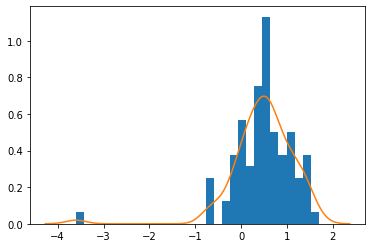

In [6]:
dens = sm.nonparametric.KDEUnivariate(GDP_g)
dens.fit()

plt.hist(GDP_g, bins=30, density=True)
plt.plot(dens.support, dens.density)
plt.show()

## Unemployment Rate

In [7]:
df = pd.read_csv("statistics_CBS/Arbeidsdeelname_per_maand__05072022_141822.csv", delimiter=';')
df.head()

,Geslacht,Leeftijd,Perioden,Werkloosheidspercentage/Seizoengecorrigeerd (%)
0,Totaal,15 tot 75 jaar,2003 1e kwartaal,5.4
1,Totaal,15 tot 75 jaar,2003 2e kwartaal,5.8
2,Totaal,15 tot 75 jaar,2003 3e kwartaal,6.1
3,Totaal,15 tot 75 jaar,2003 4e kwartaal,6.4
4,Totaal,15 tot 75 jaar,2004 1e kwartaal,6.6


In [8]:
Unemp_rates = df['Werkloosheidspercentage/Seizoengecorrigeerd (%)'].to_numpy() / 100

In [9]:
compute_moments_autocorr(Unemp_rates, "unemployment rate")

Moments:
    unemployment rate first moment: 0.061%
    unemployment rate second moment: 0.0
    unemployment rate third moment: 0.279
    unemployment rate fourth moment: -0.767

Autocorrelations:
    unemployment rate autocorrelation 1st: 0.974, pval: 0.0
    unemployment rate autocorrelation 2nd: 0.921, pval: 0.0
    unemployment rate autocorrelation 3rd: 0.857, pval: 0.0


In [19]:
Unemp_rates_change = (Unemp_rates[1:] - Unemp_rates[:-1]) / Unemp_rates[:-1]

In [20]:
compute_moments_autocorr(Unemp_rates_change, "unemployment rate change")

Moments:
    unemployment rate change first moment: -0.003%
    unemployment rate change second moment: 0.003
    unemployment rate change third moment: 1.066
    unemployment rate change fourth moment: 2.138

Autocorrelations:
    unemployment rate change autocorrelation 1st: 0.462, pval: 0.0
    unemployment rate change autocorrelation 2nd: 0.109, pval: 0.36
    unemployment rate change autocorrelation 3rd: 0.181, pval: 0.129


In [13]:
# Compute correlation between GDP growth and unemployment rate
GDP_UR_corr = stats.pearsonr(Unemp_rates[:63], GDP_g[27:])
print(f"corr GDP UR change: {GDP_UR_corr[0]}, pval: {GDP_UR_corr[1]}")

corr GDP UR change: 0.18219323155701653, pval: 0.15296162476879224


In [14]:
# Compute correlation between GDP growth and unemployment change
GDP_dUR_corr = stats.pearsonr(Unemp_rates_change[:64], GDP_g[26:])
print(f"corr GDP dUR change: {GDP_dUR_corr[0]}, pval: {GDP_dUR_corr[1]}")

corr GDP dUR change: -0.5095619500299846, pval: 1.7048155065202144e-05


In [15]:
dGDP = GDP_g[27:]
Ur = Unemp_rates[:63]

## Emissions

No exact number for indeces available, so indeces are interpolated

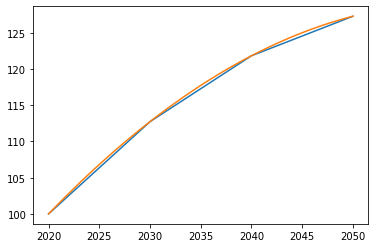

In [16]:
indeces = [100, 112.72727273, 121.81818182, 127.27272727]
years = [2020, 2030, 2040, 2050]

deg = 3

p = np.poly1d(np.polyfit(years, indeces, deg))

xrange=np.linspace(2020, 2050, len(dGDP))
plt.plot(years, indeces)
plt.plot(xrange, p(xrange))
plt.show()

em = p(xrange)

In [32]:
xrange = np.linspace(2020, 2050, 361)
em = p(xrange)

em_dict = {f"gdp_{100 + i}": [em_i] for i, em_i in enumerate(em)}
pd.DataFrame(em_dict).to_csv('emissions_interpolated.csv', index=False)

## Save data

In [18]:
# truedat = np.array([dGDP, Ur, em]).T
truedat = {"dGDP": dGDP, "Ur": Ur, "em": em}
pd.DataFrame(truedat).to_csv('../parameters/calibration/calibrationdata/truedata.csv', index=False)

ValueError: All arrays must be of the same length